***MUHAMMAD TAYYAB   F2021266428   ***   
                                Question 3
                                DATA MINING V1
                                

Import two datasets iris and higher education dataset as .csv
BEcause they are available as .data on uci website


In [1]:
import pandas as pd

# Load Iris dataset
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']  # Add proper column names
iris_df = pd.read_csv(iris_url, header=None, names=iris_columns)
iris_df.to_csv("iris.csv", index=False)
print("Iris dataset saved as iris.csv")

# Load Higher Education dataset
education_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
!wget $education_url -O student.zip  # Download the dataset
!unzip student.zip -d student_data   # Unzip the dataset

# Load the specific file from the unzipped folder (adjust the path and file based on the downloaded dataset)
education_df = pd.read_csv("student_data/student-mat.csv", sep=";")  # Example for student-mat.csv
education_df.to_csv("education.csv", index=False)
print("Higher Education dataset saved as education.csv")


Iris dataset saved as iris.csv
--2024-11-24 15:05:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.008s  

2024-11-24 15:05:39 (2.60 MB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student_data/student-mat.csv  
  inflating: student_data/student-por.csv  
  inflating: student_data/student-merge.R  
  inflating: student_data/student.txt  
Higher Education dataset saved as education.csv


In [2]:
import os
print(os.listdir())


['.config', 'education.csv', 'student.zip', 'iris.csv', 'student_data', 'sample_data']


In [3]:
iris_df = pd.read_csv("iris.csv")
education_df = pd.read_csv("education.csv")


Exploring some rows to check dataset

In [4]:
print(iris_df.head())
print(education_df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1  

### ***Now start working***

**(a) Types of Attributes**
Analyze the types of attributes (continuous or categorical) and identify input and class attributes.

In [5]:
# (a) Analyze attribute types
def describe_attributes(df):
    print("Data Types of Attributes:")
    print(df.dtypes)
    print("\nAttribute Types:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: Categorical (Nominal/Ordinal)")
        else:
            print(f"{col}: Continuous (Interval/Ratio)")

# Load the datasets
iris_df = pd.read_csv("iris.csv")
education_df = pd.read_csv("education.csv")

# Describe attributes for Iris dataset
print("Iris Dataset:")
describe_attributes(iris_df)

# Describe attributes for Higher Education dataset
print("\nHigher Education Dataset:")
describe_attributes(education_df)


Iris Dataset:
Data Types of Attributes:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

Attribute Types:
sepal_length: Continuous (Interval/Ratio)
sepal_width: Continuous (Interval/Ratio)
petal_length: Continuous (Interval/Ratio)
petal_width: Continuous (Interval/Ratio)
class: Categorical (Nominal/Ordinal)

Higher Education Dataset:
Data Types of Attributes:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc  

**(b)** Five-Number Summary for Continuous Attributes & Mode for Categorical Attributes

In [7]:
# (b) Five-number summary and mode

import numpy as np
def five_number_summary(df, continuous_cols, categorical_cols):
    print("\nFive-Number Summary for Continuous Attributes:")
    for col in continuous_cols:
        print(f"{col}: {np.percentile(df[col], [0, 25, 50, 75, 100])}")

    print("\nMode for Categorical Attributes:")
    for col in categorical_cols:
        print(f"{col}: {df[col].mode()[0]}")

# Example columns
iris_continuous = ['sepal_length', 'sepal_width']  # Adjust column names if needed
education_continuous = ['G1', 'G2']  # Adjust these for the Higher Education dataset
education_categorical = ['sex', 'address']  # Adjust these for the actual dataset

print("\nIris Dataset:")
five_number_summary(iris_df, iris_continuous, [])

print("\nHigher Education Dataset:")
five_number_summary(education_df, education_continuous, education_categorical)



Iris Dataset:

Five-Number Summary for Continuous Attributes:
sepal_length: [4.3 5.1 5.8 6.4 7.9]
sepal_width: [2.  2.8 3.  3.3 4.4]

Mode for Categorical Attributes:

Higher Education Dataset:

Five-Number Summary for Continuous Attributes:
G1: [ 3.  8. 11. 13. 19.]
G2: [ 0.  9. 11. 13. 19.]

Mode for Categorical Attributes:
sex: F
address: U


**(c)** Mean and Standard Deviation for Two Continuous Attributes

In [8]:

def compute_mean_std(df, continuous_cols):
    print("\nMean and Standard Deviation:")
    for col in continuous_cols:
        print(f"{col} - Mean: {df[col].mean()}, Std: {df[col].std()}")

# For Iris dataset
print("\nIris Dataset:")
compute_mean_std(iris_df, iris_continuous)

# For Higher Education dataset
print("\nHigher Education Dataset:")
compute_mean_std(education_df, education_continuous)



Iris Dataset:

Mean and Standard Deviation:
sepal_length - Mean: 5.843333333333334, Std: 0.8280661279778629
sepal_width - Mean: 3.0540000000000003, Std: 0.4335943113621737

Higher Education Dataset:

Mean and Standard Deviation:
G1 - Mean: 10.90886075949367, Std: 3.3191946715076686
G2 - Mean: 10.713924050632912, Std: 3.761504659556034


**(d)** Quantile (Percentile) Plots for Two Attributes


Quantile Plots for Iris Dataset:


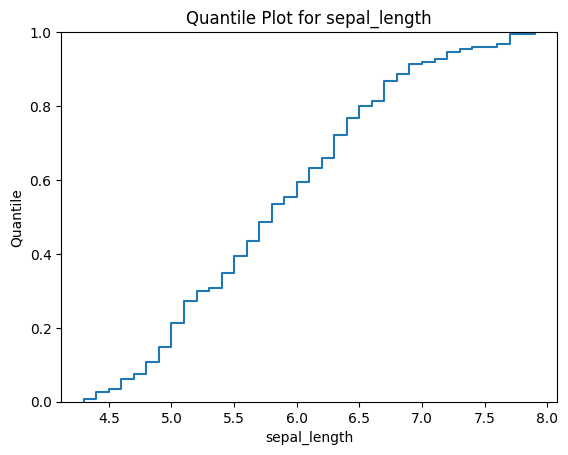

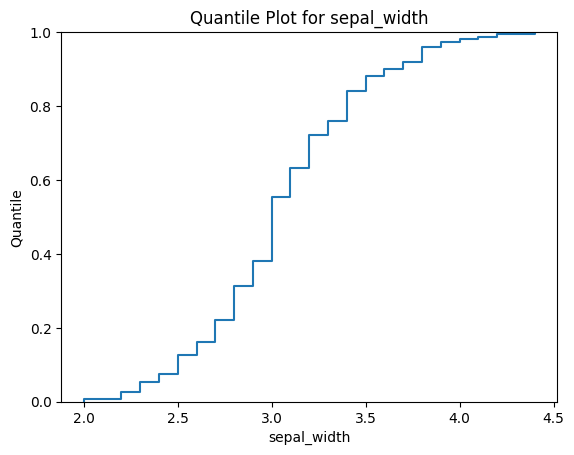


Quantile Plots for Higher Education Dataset:


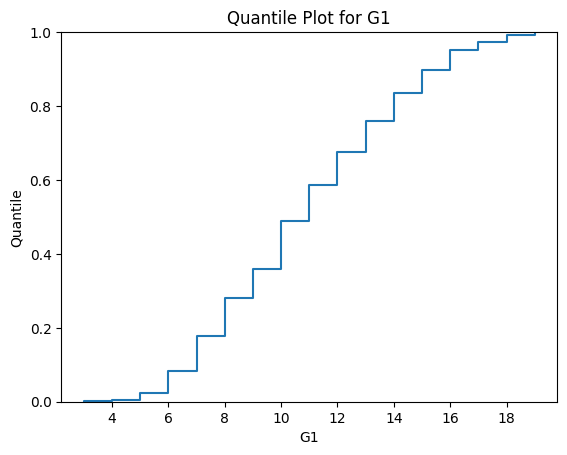

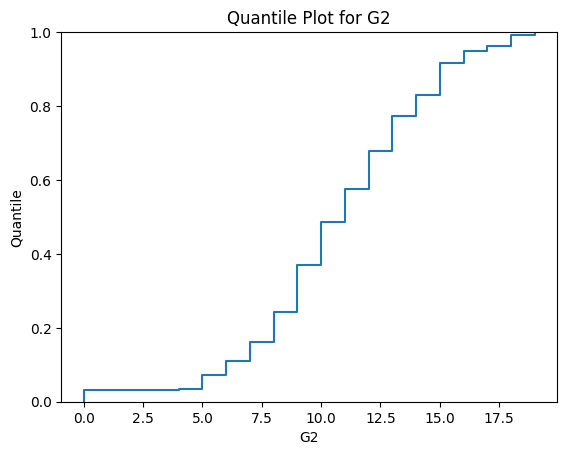

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
def quantile_plot(df, columns):
    for col in columns:
        sns.ecdfplot(data=df, x=col)
        plt.title(f"Quantile Plot for {col}")
        plt.xlabel(col)
        plt.ylabel("Quantile")
        plt.show()

print("\nQuantile Plots for Iris Dataset:")
quantile_plot(iris_df, iris_continuous)

print("\nQuantile Plots for Higher Education Dataset:")
quantile_plot(education_df, education_continuous)


**(e)** Histogram or Distribution Plot for Two Attributes




Histograms for Iris Dataset:


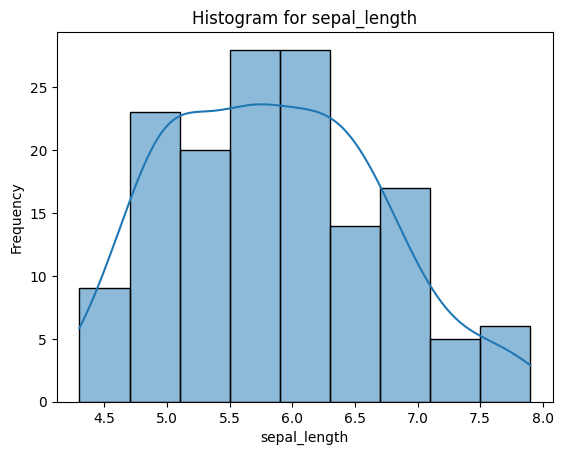

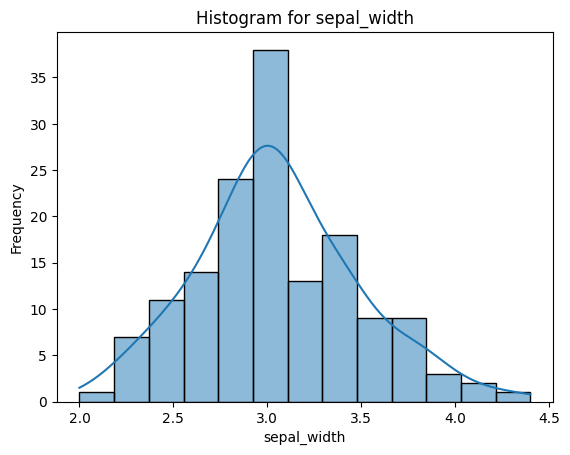


Histograms for Higher Education Dataset:


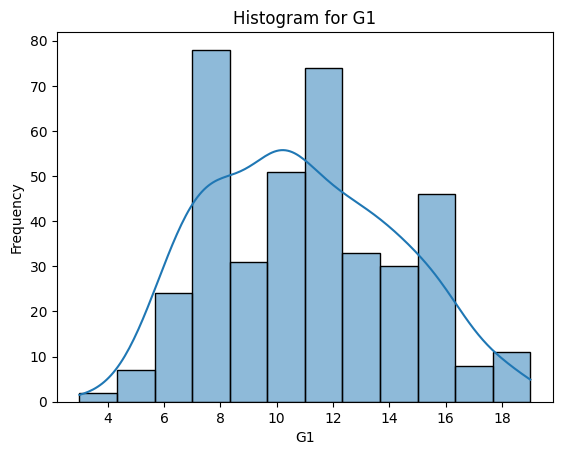

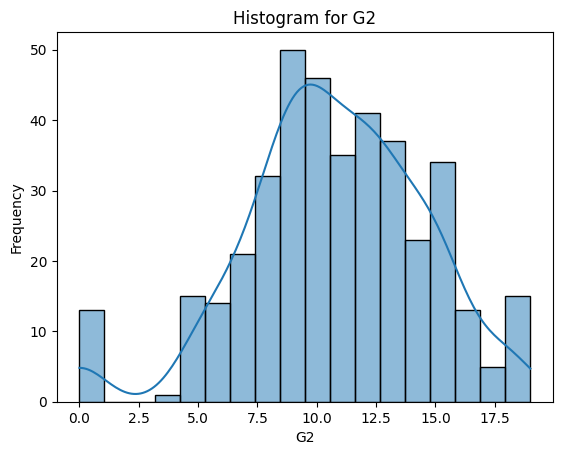

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
def histogram_plot(df, columns):
    for col in columns:
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

print("\nHistograms for Iris Dataset:")
histogram_plot(iris_df, iris_continuous)

print("\nHistograms for Higher Education Dataset:")
histogram_plot(education_df, education_continuous)


(f) Scatter Plots for Two Attributes


Scatter Plots for Iris Dataset:


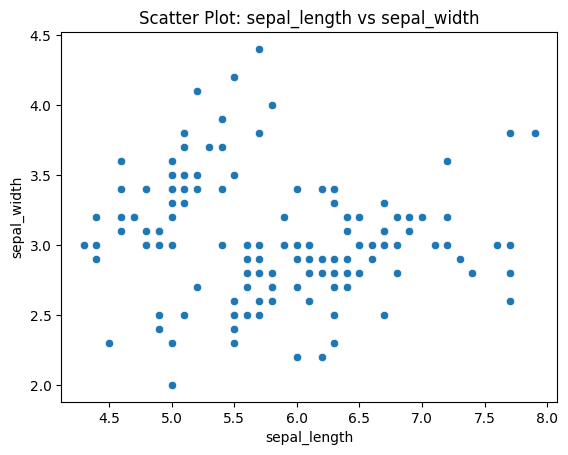


Scatter Plots for Higher Education Dataset:


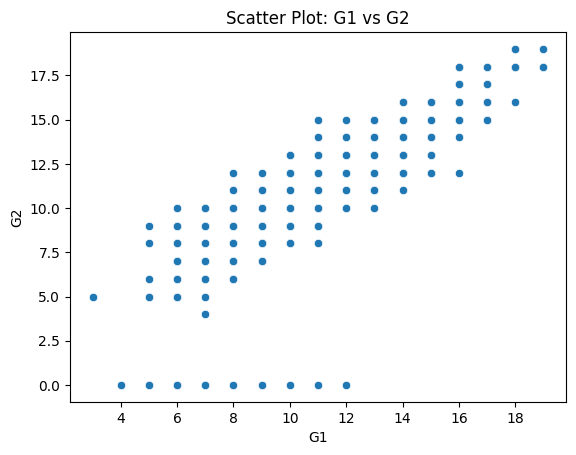

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def scatter_plot(df, columns):
    sns.scatterplot(data=df, x=columns[0], y=columns[1])
    plt.title(f"Scatter Plot: {columns[0]} vs {columns[1]}")
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()

print("\nScatter Plots for Iris Dataset:")
scatter_plot(iris_df, iris_continuous)

print("\nScatter Plots for Higher Education Dataset:")
scatter_plot(education_df, education_continuous)
